In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

In [174]:
#Read in the user data
engagement = pd.read_csv('/Users/zhengzhang/Downloads/relax_challenge/takehome_user_engagement.csv')

In [175]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [176]:
engagement['login']=pd.to_datetime(engagement['time_stamp'])

In [177]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  object        
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   login       207917 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.3+ MB


In [178]:
#temp=engagement.drop(['time_stamp'],axis=1)
#pivoted=temp.pivot('user_id','login','visited')

In [179]:
#temp

In [180]:
engagement['last_login']=engagement.groupby(['user_id'])['login'].transform(np.max)

In [181]:
engagement['first_login']=engagement.groupby(['user_id'])['login'].transform(np.min)
engagement.head()

,time_stamp,user_id,visited,login,last_login,first_login
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22 03:53:30,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04


In [182]:
engagement['total_login']=engagement.groupby(['user_id'])['visited'].transform(np.sum)
engagement.head()
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time_stamp   207917 non-null  object        
 1   user_id      207917 non-null  int64         
 2   visited      207917 non-null  int64         
 3   login        207917 non-null  datetime64[ns]
 4   last_login   207917 non-null  datetime64[ns]
 5   first_login  207917 non-null  datetime64[ns]
 6   total_login  207917 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 11.1+ MB


In [183]:
from pandas.tseries.offsets import Hour, Minute
engagement['time_lapse']=(engagement['last_login']-engagement['first_login'])
engagement['day_lapse']=engagement['time_lapse'].dt.days

In [184]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   time_stamp   207917 non-null  object         
 1   user_id      207917 non-null  int64          
 2   visited      207917 non-null  int64          
 3   login        207917 non-null  datetime64[ns] 
 4   last_login   207917 non-null  datetime64[ns] 
 5   first_login  207917 non-null  datetime64[ns] 
 6   total_login  207917 non-null  int64          
 7   time_lapse   207917 non-null  timedelta64[ns]
 8   day_lapse    207917 non-null  int64          
dtypes: datetime64[ns](3), int64(4), object(1), timedelta64[ns](1)
memory usage: 14.3+ MB


In [185]:
engagement.head()

,time_stamp,user_id,visited,login,last_login,first_login,total_login,time_lapse,day_lapse
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0 days,0
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136


In [202]:
engagement['total3']=engagement['total_login']>=3
engagement['day7']=engagement['day_lapse']<=7
engagement['freq']=engagement['day_lapse']/engagement['total_login']
engagement['dayfreq']=engagement['freq']<3 
engagement['adopt']=engagement['total3']&engagement['dayfreq']

In [203]:
engagement.head()

,time_stamp,user_id,visited,login,last_login,first_login,total_login,time_lapse,day_lapse,total3,day7,freq,adopt,dayfreq
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0 days,0,False,True,0.000000,False,True
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136,True,False,9.714286,False,False
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136,True,False,9.714286,False,False
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136,True,False,9.714286,False,False
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136 days,136,True,False,9.714286,False,False


In [204]:
pd.crosstab(engagement['total3'],engagement['adopt'])

adopt,False,True
total3,,
False,6915,0
True,45291,155711


In [210]:
temp=engagement.drop(['time_stamp','visited','time_lapse','login'],axis=1)
data=temp.drop_duplicates(subset="user_id",keep='first')
pd.crosstab(data['total3'],data['adopt'])

adopt,False,True
total3,,
False,6575,0
True,1597,651


In [211]:
data

,user_id,last_login,first_login,total_login,day_lapse,total3,day7,freq,adopt,dayfreq
0,1,2014-04-22 03:53:30,2014-04-22 03:53:30,1,0,False,True,0.000000,False,True
1,2,2014-03-31 03:45:04,2013-11-15 03:45:04,14,136,True,False,9.714286,False,False
15,3,2013-03-19 23:14:52,2013-03-19 23:14:52,1,0,False,True,0.000000,False,True
16,4,2013-05-22 08:09:28,2013-05-22 08:09:28,1,0,False,True,0.000000,False,True
17,5,2013-01-22 10:14:20,2013-01-22 10:14:20,1,0,False,True,0.000000,False,True
...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,2013-09-06 06:14:15,1,0,False,True,0.000000,False,True
207913,11997,2013-01-15 18:28:37,2013-01-15 18:28:37,1,0,False,True,0.000000,False,True
207914,11998,2014-04-27 12:45:16,2014-04-27 12:45:16,1,0,False,True,0.000000,False,True
207915,11999,2012-06-02 11:55:59,2012-06-02 11:55:59,1,0,False,True,0.000000,False,True


In [215]:
users = pd.read_csv('/Users/zhengzhang/Downloads/relax_challenge/takehome_users.csv')

In [216]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


In [217]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,3:53:30 AM,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,3:45:04 AM,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,11:14:52 PM,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,8:09:28 AM,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,10:14:20 AM,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [220]:
combined=pd.merge(data,users,left_on="user_id",right_on='object_id',how='outer')
combined.info()
combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   float64       
 1   last_login                  8823 non-null   datetime64[ns]
 2   first_login                 8823 non-null   datetime64[ns]
 3   total_login                 8823 non-null   float64       
 4   day_lapse                   8823 non-null   float64       
 5   total3                      8823 non-null   object        
 6   day7                        8823 non-null   object        
 7   freq                        8823 non-null   float64       
 8   adopt                       8823 non-null   object        
 9   dayfreq                     8823 non-null   object        
 10  object_id                   12000 non-null  int64         
 11  creation_time               12000 non-null  object    

,user_id,last_login,first_login,total_login,day_lapse,total3,day7,freq,adopt,dayfreq,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1.0,2014-04-22 03:53:30,2014-04-22 03:53:30,1.0,0.0,False,True,0.000000,False,True,1,3:53:30 AM,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2.0,2014-03-31 03:45:04,2013-11-15 03:45:04,14.0,136.0,True,False,9.714286,False,False,2,3:45:04 AM,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3.0,2013-03-19 23:14:52,2013-03-19 23:14:52,1.0,0.0,False,True,0.000000,False,True,3,11:14:52 PM,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4.0,2013-05-22 08:09:28,2013-05-22 08:09:28,1.0,0.0,False,True,0.000000,False,True,4,8:09:28 AM,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5.0,2013-01-22 10:14:20,2013-01-22 10:14:20,1.0,0.0,False,True,0.000000,False,True,5,10:14:20 AM,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [227]:
values={'user_id':'object_id','adopt':False}
combined.fillna(value=values,inplace=True)
combined['adopt'].value_counts()

False    11349
True       651
Name: adopt, dtype: int64

In [250]:
combined['creation_source'].value_counts(normalize=True)

ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64

In [229]:
combined['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [231]:
dummy=pd.get_dummies(combined['creation_source'])
dummy

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
11995,0,0,1,0,0
11996,0,0,1,0,0
11997,0,0,1,0,0
11998,0,0,1,0,0


In [245]:
data=pd.concat([dummy,combined],axis=1)
data1=data.drop(['org_id','invited_by_user_id','creation_time','creation_source','last_session_creation_time','SIGNUP','user_id','last_login','first_login','total_login','day_lapse','dayfreq','total3','day7','freq'],axis=1)
data1.head()

,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP_GOOGLE_AUTH,adopt,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,0,0,0,False,1,1,0
1,0,1,0,0,False,2,0,0
2,0,1,0,0,False,3,0,0
3,1,0,0,0,False,4,0,0
4,1,0,0,0,False,5,0,0


In [248]:
combined['opted_in_to_mailing_list'].value_counts(normalize=True)

0    0.7505
1    0.2495
Name: opted_in_to_mailing_list, dtype: float64

In [249]:
combined['enabled_for_marketing_drip'].value_counts(normalize=True)

0    0.850667
1    0.149333
Name: enabled_for_marketing_drip, dtype: float64

In [254]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [255]:
#prepare the predictor X
#prepare y
y=data1['adopt']
X=data1.drop(['adopt','object_id'],axis=1)

In [256]:
y.value_counts()

False    11349
True       651
Name: adopt, dtype: int64

In [258]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   GUEST_INVITE                12000 non-null  uint8
 1   ORG_INVITE                  12000 non-null  uint8
 2   PERSONAL_PROJECTS           12000 non-null  uint8
 3   SIGNUP_GOOGLE_AUTH          12000 non-null  uint8
 4   opted_in_to_mailing_list    12000 non-null  int64
 5   enabled_for_marketing_drip  12000 non-null  int64
dtypes: int64(2), uint8(4)
memory usage: 648.1 KB


In [259]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [261]:
#use balanced random forest
from imblearn.ensemble import BalancedRandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
param_grid = {'n_estimators': np.arange(50, 100)}
brf = BalancedRandomForestClassifier(random_state=21)
brf_cv = GridSearchCV(brf, param_grid, cv=5)
brf_cv.fit(X_train, y_train)
brf_cv.best_params_

{'n_estimators': 89}

In [262]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import sensitivity_specificity_support, sensitivity_score, specificity_score
y_pred = brf_cv.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.5461538461538462


In [263]:
print(confusion_matrix(y_pred,y_test))

[[1589   73]
 [1816  122]]


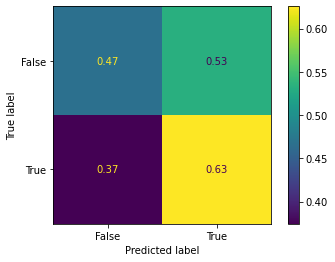

In [265]:
plot_confusion_matrix(brf_cv,X_test,y_test,normalize='true')

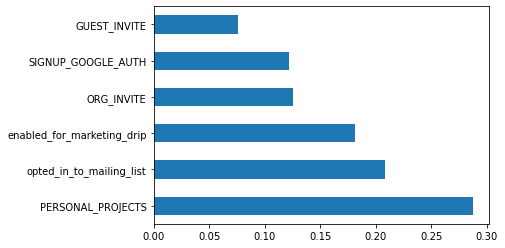

In [267]:
import matplotlib.pyplot as plt
brf.fit(X_train, y_train)
feat_importances = pd.Series(brf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [268]:
# TRY AdaBoost
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=21)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.5401219925449

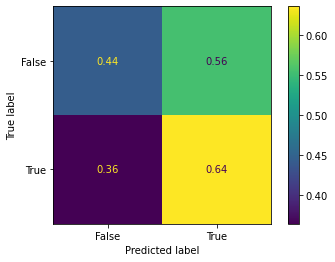

In [271]:
plot_confusion_matrix(eec,X_test,y_test,normalize='true')